<a href="https://colab.research.google.com/github/junseokkim00/Artificial_Intelligence/blob/main/classification/%5Bassignment%5D_SVM_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/ML_metacode_lab/classification

/content/drive/MyDrive/ML_metacode_lab/classification


In [3]:
# Basic setting
import os
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# [과제] 최적의 SVM 모델 찾기

---

## 본 과제의 목표는 다음과 같음

1. `rbf` 커널 함수를 사용한 SVM 모델을 정의할 수 있음
2. 학습과 평가 데이터셋을 나눌 수 있으며, 평가 데이터셋에 대한 분류 성능을 평가할 수 있음
3. `sklearn`에서 제공하는 하이퍼파라미터 서치 툴을 사용할 수 있음
4. SVM 모델 구현에 사용되는 하이퍼파라미터의 역할을 이해하고 분석할 수 있음

## [P.1] SVM 모델을 다양한 하이퍼파라미터로 학습하기

`rbf` 커널 함수를 사용한 SVM 모델을 정의할 때, 다양한 하이퍼파라미터 값을 설정해서 학습하며 성능 비교하기    
참고로, 이전 practice 파일에서처럼 학습 데이터셋이 아닌, 사이킷런 함수를 통해 만든 평가 데이터셋에 대해서 성능 평가하기

In [4]:
# Make train and test dataset
from sklearn.model_selection import train_test_split  # divide train and test
from sklearn.datasets import make_moons  # moons dataset

X, y = make_moons(n_samples = 1000, noise = 0.5, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

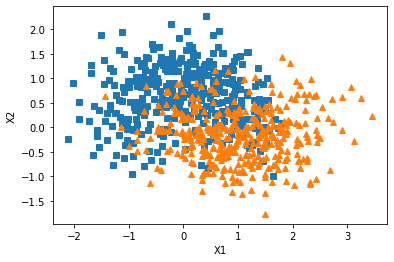

In [5]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    
    plt.xlabel("X1")
    plt.ylabel("X2")
    
    
plot_dataset(X_train, y_train)

In [6]:
# define model with pipeline
from sklearn.pipeline import Pipeline  # pipeline
from sklearn.preprocessing import StandardScaler   # scaler
from sklearn.svm import SVC   # svc

In [7]:
# 평가 데이터셋에 대한 성능 확인을 위해서 sklearn.metrics 안의 함수를 사용해주세요
from sklearn.metrics import accuracy_score

In [8]:
gamma1, gamma2 = 0.1 , 1
C1, C2 = 0.1, 10

params = [(gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)]  # any combination you want!

svm_clfs = []
for g, C in params:
    svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf",SVC(kernel="rbf", gamma=g, C=C))
    ])
    svm_clf.fit(X_train, y_train)
    
    svm_clfs.append(svm_clf)

In [9]:
def plot_predictions(clf):
    x0 = np.linspace(-3, 3, 100)
    x1 = np.linspace(-3, 3, 100)
    x0, x1 = np.meshgrid(x0, x1)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X)
    y_pred = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.1)

In [11]:
x0 = np.linspace(-3, 3, 100)
x1 = np.linspace(-3, 3, 100)
x0, x1 = np.meshgrid(x0, x1)
X = np.c_[x0.ravel(), x1.ravel()]
X

array([[-3.        , -3.        ],
       [-2.93939394, -3.        ],
       [-2.87878788, -3.        ],
       ...,
       [ 2.87878788,  3.        ],
       [ 2.93939394,  3.        ],
       [ 3.        ,  3.        ]])

[(0.1, 0.1)] Acc: 0.788
[(0.1, 10)] Acc: 0.808
[(1, 0.1)] Acc: 0.824
[(1, 10)] Acc: 0.816


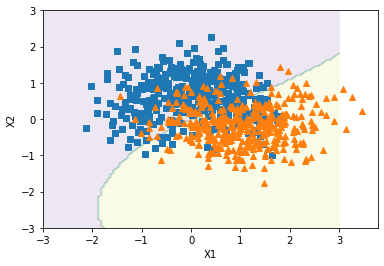

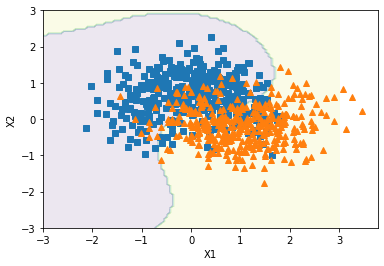

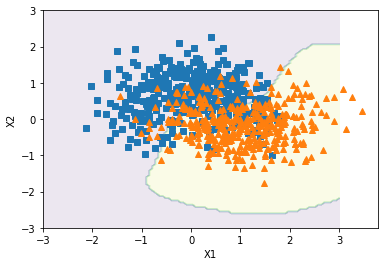

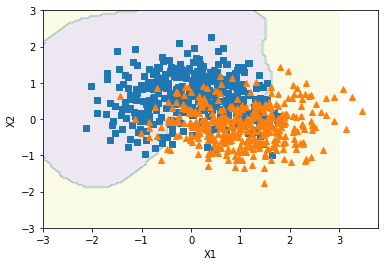

In [13]:
for i, svm_clf in enumerate(svm_clfs):
    plt.figure(figsize=(6, 4))
    
    plot_dataset(X_train, y_train)
    
    plot_predictions(svm_clf)
    
    y_pred = svm_clf.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    
    print('[%s] Acc: %s' % (params[i], acc))

## [P.2] GridSearchCV를 이용해 최적의 하이퍼파라미터 찾기

직접 하나부터 열까지 구현하는 것을 방지하기 위해 사이킷런에서는 유용한 툴을 제공해주고 있음    
`sklearn`의 [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 클래스를 이용해서 교차 검증을 구현해보기     
`make_moons` 데이터셋에 가장 적합한 하이퍼파라미터를 찾고, 평가 데이터에 대한 최고 성능 얻기

In [15]:
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

############################################################################
##### 찾고싶은 하이퍼파라미터와 후보군들을 dictionary 형태로 만들어서 학습하시면 됩니다. #####
svm_clf = SVC()
param_grid = {'kernel' : ["linear", "poly", "rbf"], "gamma" : [0.1, 1], "C": [0.1, 10]}

grid_search_cv = GridSearchCV(svm_clf, param_grid)
grid_search_cv.fit(X_train, y_train)


############################################################################

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10], 'gamma': [0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [24]:
pd.DataFrame(grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007273,0.001792,0.001477,0.000235,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.773333,0.820000,0.820000,0.840000,0.813333,0.813333,0.021909,3
1,0.010954,0.000315,0.002818,0.000029,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.586667,0.640000,0.573333,0.613333,0.606667,0.604000,0.022940,12
2,0.010367,0.000564,0.003293,0.000122,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.780000,0.813333,0.813333,0.820000,0.813333,0.808000,0.014236,8
3,0.006049,0.000218,0.001626,0.000196,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.773333,0.820000,0.820000,0.840000,0.813333,0.813333,0.021909,3
4,0.007789,0.000442,0.001824,0.000084,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.720000,0.813333,0.753333,0.780000,0.806667,0.774667,0.034615,10
5,0.010419,0.001898,0.002927,0.000282,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.786667,0.826667,0.826667,0.846667,0.813333,0.820000,0.019777,1
6,0.011647,0.001312,0.001330,0.000042,10,0.1,linear,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",0.773333,0.820000,0.820000,0.833333,0.813333,0.812000,0.020396,6
7,0.007793,0.000224,0.001974,0.000052,10,0.1,poly,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}",0.740000,0.773333,0.720000,0.733333,0.746667,0.742667,0.017689,11
8,0.009168,0.000768,0.002899,0.000646,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.773333,0.820000,0.813333,0.846667,0.813333,0.813333,0.023476,3
9,0.011170,0.000831,0.001677,0.000158,10,1,linear,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}",0.773333,0.820000,0.820000,0.833333,0.813333,0.812000,0.020396,6


In [25]:
grid_search_cv.best_estimator_

SVC(C=0.1, gamma=1)

In [26]:
############################################################################
############### 적절한 함수를 찾아 y_test에 대한 성능을 얻으시면 됩니다. ###############
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test,y_pred)
############################################################################

0.816

## [P.3] 하이퍼파라미터 서치 결과 분석

P.2에서 구현했던 내용을 바탕으로, 아래 질문에 대한 답변 작성

#### Q.1) 어떤 하이퍼파라미터와 값들을 후보군으로 설정했는지 서술
---

#### Q.2) 해당 하이퍼파라미터의 역할을 분석하고, 왜 해당 결과값이 가장 좋은 성능을 보여줄 수 있었는지에 대해 자유롭게 작성
---